# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
295544               2020-07-31           2020-07-08            2020-07-30   
295545               2020-07-31           2020-07-22            2020-07-04   
295546               2020-07-31           2020-07-30            2020-07-30   
295547               2020-07-31           2020-07-26            2020-07-17   
295548               2020-07-31           2020-07-22            2020-07-30   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
295544             2020-06-25 00:00:00                   NaT   
295545             2020-07-02 00:00:00                   NaT   
295546             2020-07-29 00:00:00                   NaT   
295547             2020-07-17 00:00:00                   NaT   
295548             2020-07-07 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
295544                    NaT              Soledad        Atlántico      Leve   
295545                    NaT               Soacha     Cundinamarca      Leve   
295546                    NaT               Soacha     Cundinamarca      Leve   
295547                    NaT     Vigía del fuerte        Antioquia      Leve   
295548                    NaT                 Cali  Valle del Cauca      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
295544            Casa  ...               50 - 60    F               NaN   
295545            Casa  ...               40 - 50    F               NaN   
295546            Casa  ...               30 - 40    F               NaN   
295547            Casa  ...               10 - 20    F               NaN   
295548            Casa  ...               30 - 40    F               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1056   1454
Antioquia                                           14721  18038
Arauca                                                 50    163
Archipiélago de San Andrés Providencia y Santa ...     12     26
Atlántico                                           10668  11994
Barranquilla D.E.                                   13710  15941
Bogotá D.C.                                         50029  51926
Bolívar                                              1141   1477
Boyacá                                                503    527
Buenaventura D.E.                                     778   1323
Caldas                                                487    470
Caquetá                                               461    473
Cartagena D.T. y C.                                  7068   8554
Casanare                                              129    177
Cauca                                                 833   1063
Cesar                                                1359   1757
Chocó                                                1365   1635
Cundinamarca                                         4213   4287
Córdoba                                              2718   2820
Guainía                                                 6      8
Guaviare                                               11     88
Huila                                                 442    466
La Guajira                                           1020   1088
Magdalena                                            1035   1122
Meta                                                  719   2040
Nariño                                               3681   4289
Norte de Santander                                    965   1377
Putumayo                                              413    496
Quindío                                               178    170
Risaralda                                             857    777
Santa Marta D.T. y C.                                1934   2047
Santander                                            1531   2218
Sucre                                                2717   3211
Tolima                                                868   1706
Valle del Cauca                                     10567  11992
Vaupés                                                 27     34
Vichada                                                 1      1

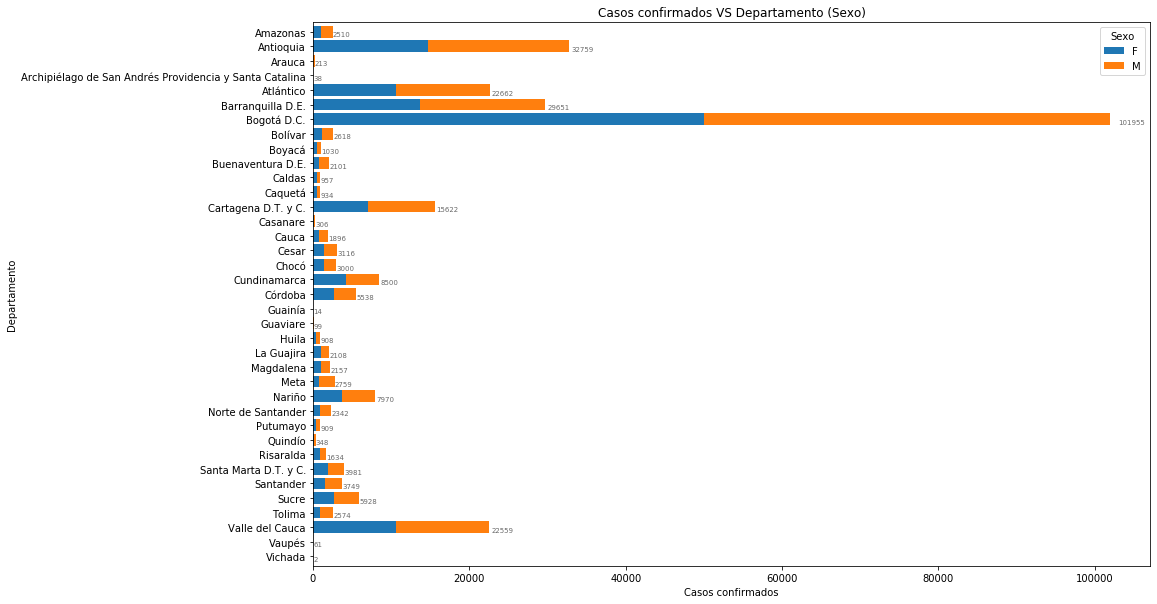

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      452      510   
Antioquia                                             1035     2261     8719   
Arauca                                                   9       42       78   
Archipiélago de San Andrés Providencia y Santa ...       0        1       10   
Atlántico                                             1000     1744     4889   
Barranquilla D.E.                                     1141     1924     6476   
Bogotá D.C.                                           4454     7761    23356   
Bolívar                                                125      255      602   
Boyacá                                                  59       96      217   
Buenaventura D.E.                                       45      280      480   
Caldas                                                  36       62      220   
Caquetá                                                 28       57      274   
Cartagena D.T. y C.                                    690     1160     3577   
Casanare                                                14       16       91   
Cauca                                                   89      163      456   
Cesar                                                  201      282      748   
Chocó                                                  126      260      709   
Cundinamarca                                           400      626     1980   
Córdoba                                                178      292     1141   
Guainía                                                  0        2        4   
Guaviare                                                 1       31       22   
Huila                                                   51       91      193   
La Guajira                                             110      208      450   
Magdalena                                              112      151      401   
Meta                                                    56      240      864   
Nariño                                                 367      680     1849   
Norte de Santander                                      73       96      545   
Putumayo                                                30       66      260   
Quindío                                                 13       19       72   
Risaralda                                               99      147      357   
Santa Marta D.T. y C.                                  154      269      882   
Santander                                              134      257      875   
Sucre                                                  233      474     1233   
Tolima                                                 109      153      754   
Valle del Cauca                                        751     1529     5193   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      342      274   
Antioquia                                              8261     5109     3857   
Arauca                                                   52       18        6   
Archipiélago de San Andrés Providencia y Santa ...       11        9        4   
Atlántico                                              5257     3608     2957   
Barranquilla D.E.                                      7036     4623     3985   
Bogotá D.C.                                           22542    16492    13794   
Bolívar                                                 613      370      233   
Boyacá                                                  202      162 

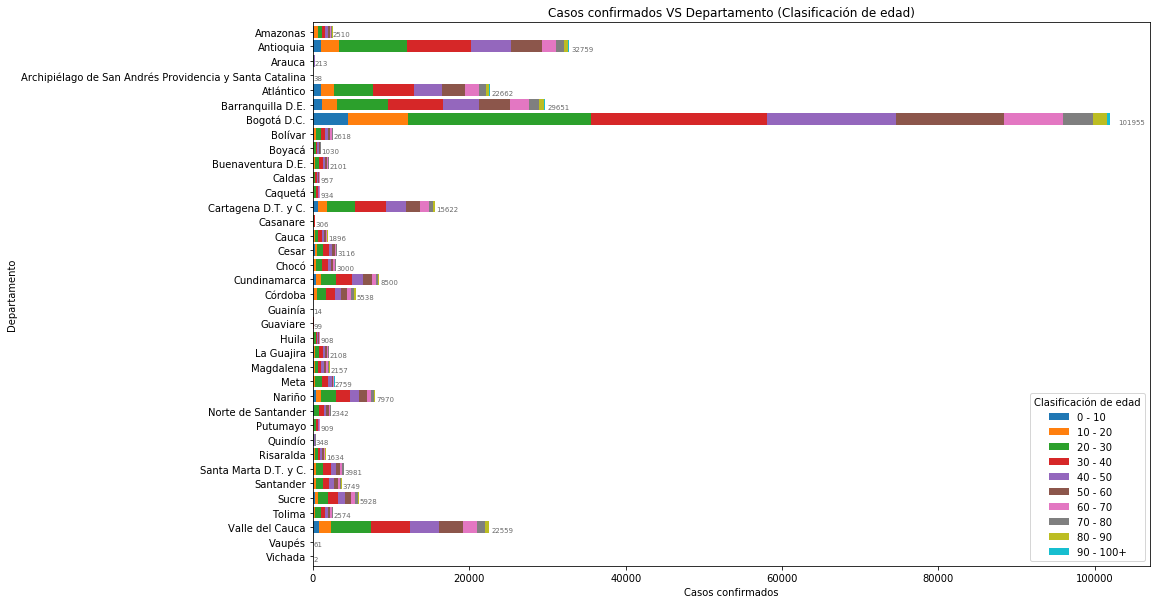

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               57.0      102.0   
Antioquia                                           20566.0      521.0   
Arauca                                                 60.0        3.0   
Archipiélago de San Andrés Providencia y Santa ...      6.0        0.0   
Atlántico                                            4954.0     1053.0   
Barranquilla D.E.                                    5396.0     1473.0   
Bogotá D.C.                                         47426.0     2748.0   
Bolívar                                               975.0      119.0   
Boyacá                                                436.0       28.0   
Buenaventura D.E.                                     254.0      142.0   
Caldas                                                598.0       11.0   
Caquetá                                               631.0       21.0   
Cartagena D.T. y C.                                  2892.0      471.0   
Casanare                                              153.0        4.0   
Cauca                                                 824.0       63.0   
Cesar                                                1266.0       64.0   
Chocó                                                 570.0      102.0   
Cundinamarca                                         3330.0      210.0   
Córdoba                                              2433.0      660.0   
Guainía                                                 0.0        1.0   
Guaviare                                               49.0        0.0   
Huila                                                 402.0       26.0   
La Guajira                                            764.0      119.0   
Magdalena                                             522.0      207.0   
Meta                                                  903.0       36.0   
Nariño                                               2685.0      255.0   
Norte de Santander                                   1470.0      104.0   
Putumayo                                              644.0       37.0   
Quindío                                               121.0        8.0   
Risaralda                                             806.0       27.0   
Santa Marta D.T. y C.                                1469.0      156.0   
Santander                                            1940.0       88.0   
Sucre                                                2005.0      371.0   
Tolima                                                941.0       53.0   
Valle del Cauca                                      7570.0      821.0   
Vaupés                                                  9.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 6.0           4.0   
Antioquia                                             1344.0         172.0   
Arauca                                                  10.0           3.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              656.0         101.0   
Barranquilla D.E.                                      732.0          83.0   
Bogotá D.C.                                           5193.0         323.0   
Bolívar                                                108.0          11.0   
Boyacá                                                  57.0           6.0   
Buenaventura D.E.                                      106.0          27.0   
Caldas                                                  30.0          11.0   
Caquetá                                                 75.0           5.0   
Cartagena D.T. y C.  

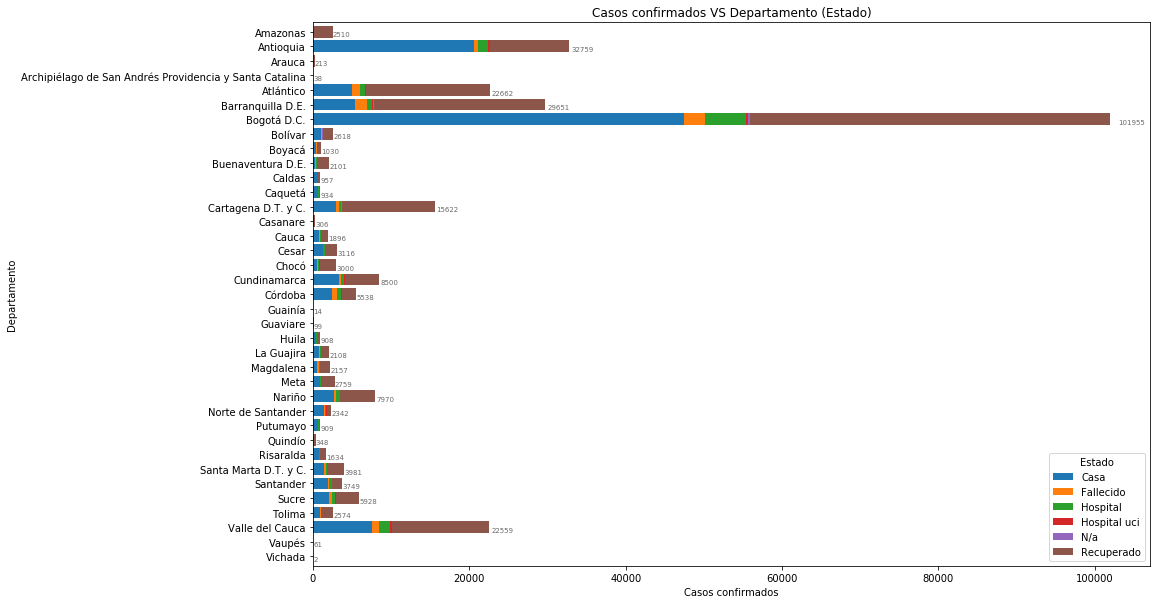

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          55388  59739
Fallecido      3649   6456
Hospital       5852   7847
Hospital uci    539   1038
N/a             263    350
Recuperado    72582  81805

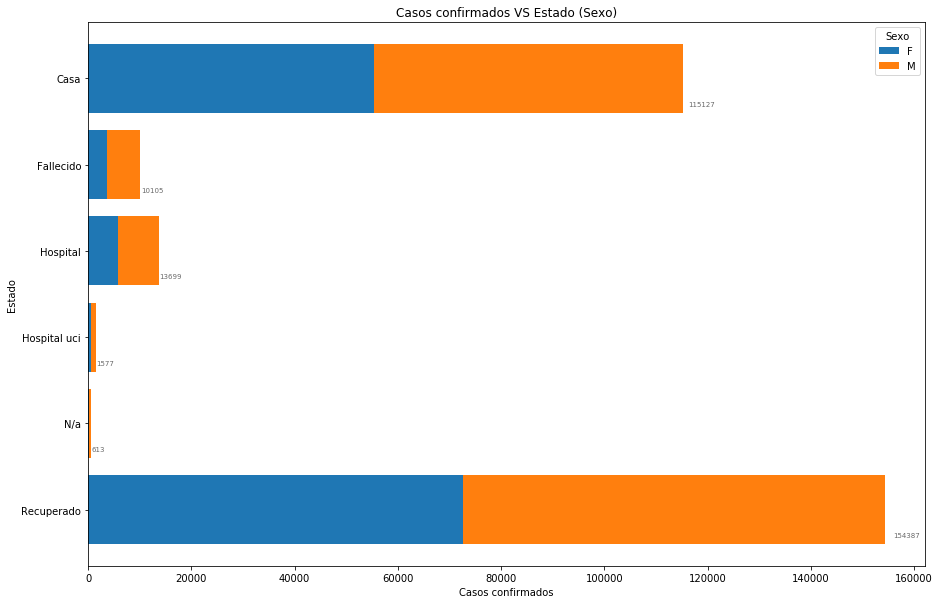

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     4426     8935    28809    28452    18875    14216   
Fallecido                  21       19      143      350      799     1530   
Hospital                  555      278     1003     1570     2020     2802   
Hospital uci               71       27       58      167      229      372   
N/a                        18       13       29       27       49       75   
Recuperado               6969    12881    38464    37751    24527    18744   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      6892     3040     1263        219  
Fallecido                 2391     2520     1894        438  
Hospital                  2720     1782      855        114  
Hospital uci               360      223       65          5  
N/a                        118      132      117         35  
Recuperado                9213     4029     1556        253

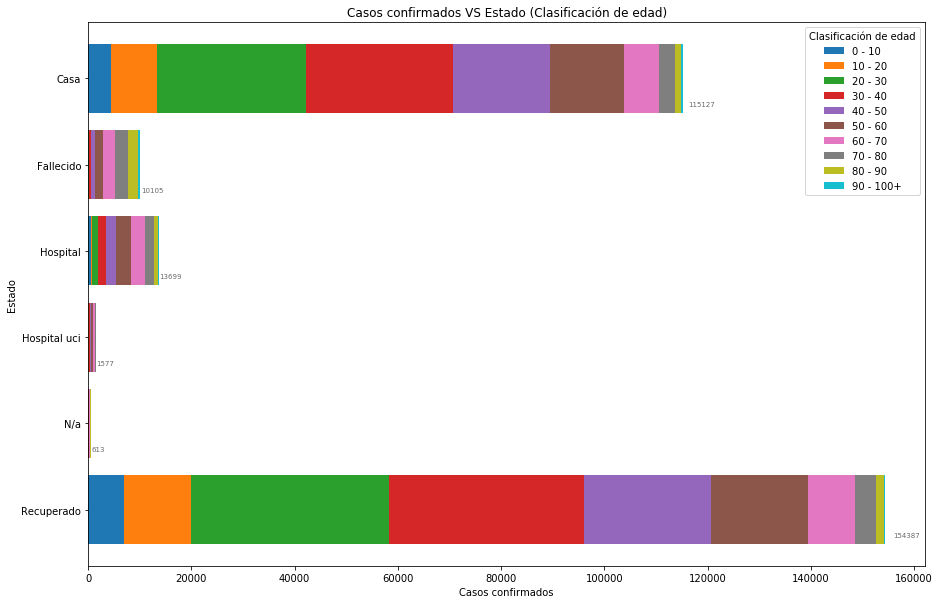

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   131583  142482
Importado       455     520
Relacionado    6235   14233

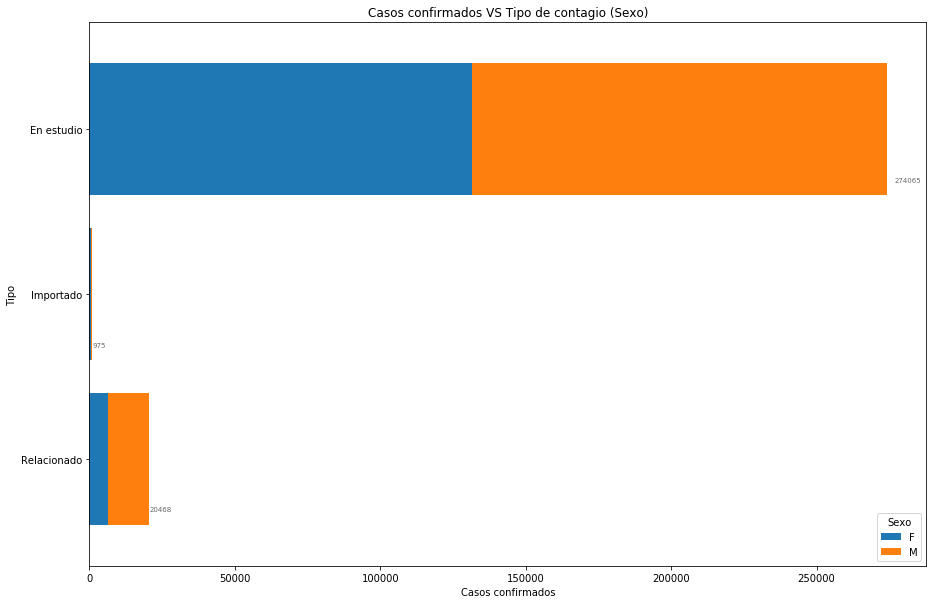

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              11144    19648    62643    63167    43589    35635   
Importado                   6       37      240      230      173      150   
Relacionado               910     2468     5623     4920     2737     1954   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               20577    11205     5459        998  
Importado                   94       35        9          1  
Relacionado               1023      486      282         65

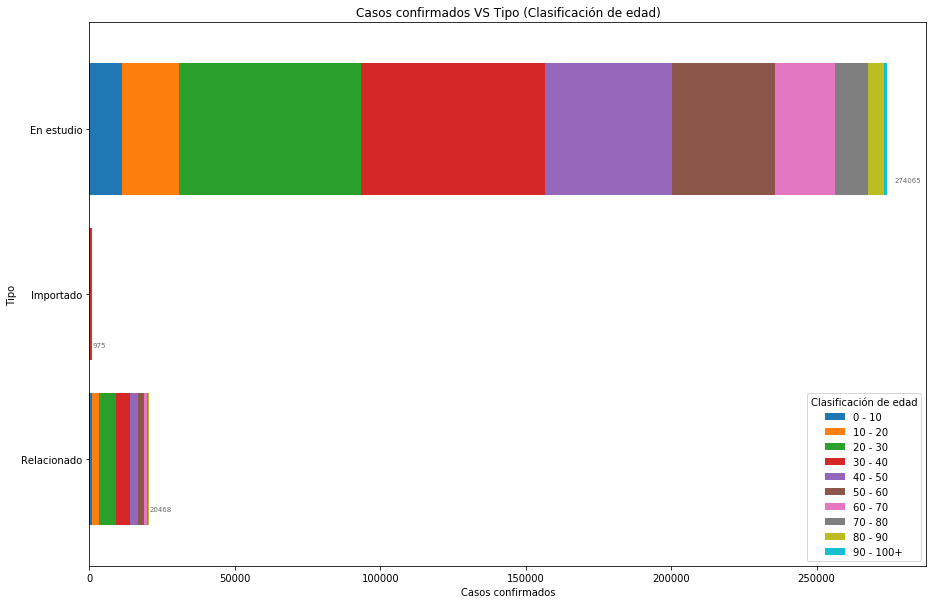

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  5948   6112
10 - 20                10214  11939
20 - 30                32678  35828
30 - 40                31400  36917
40 - 50                21790  24709
50 - 60                17560  20179
60 - 70                 9940  11754
70 - 80                 5305   6421
80 - 90                 2828   2922
90 - 100+                610    454

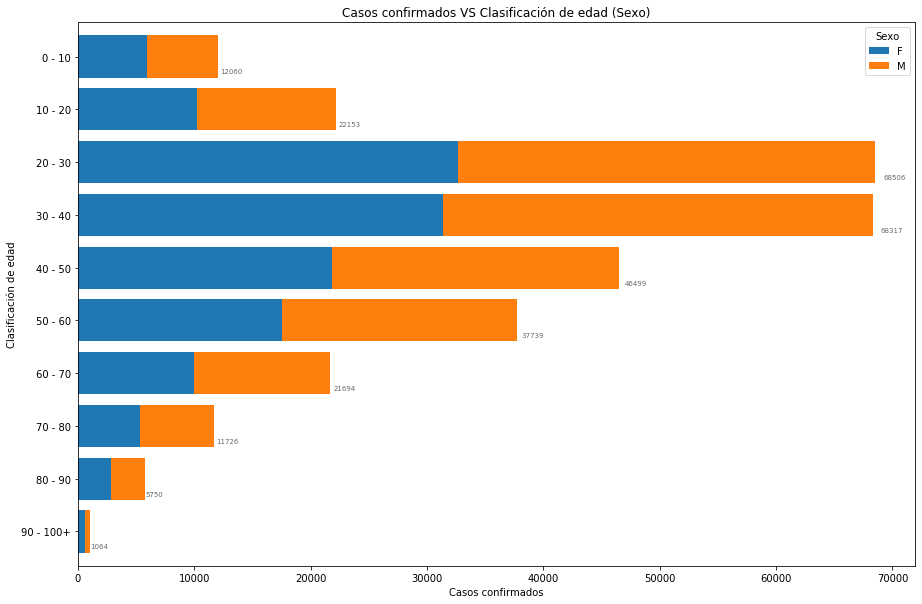

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  4426         21       555            71   18   
10 - 20                 8935         19       278            27   13   
20 - 30                28809        143      1003            58   29   
30 - 40                28452        350      1570           167   27   
40 - 50                18875        799      2020           229   49   
50 - 60                14216       1530      2802           372   75   
60 - 70                 6892       2391      2720           360  118   
70 - 80                 3040       2520      1782           223  132   
80 - 90                 1263       1894       855            65  117   
90 - 100+                219        438       114             5   35   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       6969  
10 - 20                     12881  
20 - 30                     38464  
30 - 40                     37751  
40 - 50                     24527  
50 - 60                     18744  
60 - 70                      9213  
70 - 80                      4029  
80 - 90                      1556  
90 - 100+                     253

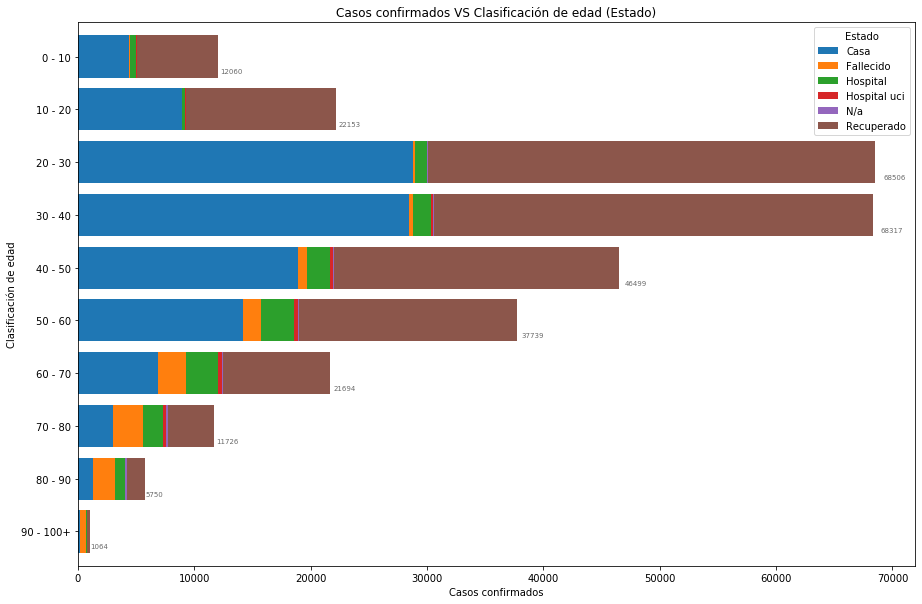

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-27            3895.0  4256.0
2020-07-28            6094.0  6460.0
2020-07-29            3596.0  3639.0
2020-07-30            3480.0  3674.0
2020-07-31             310.0   296.0

[145 rows x 2 columns]

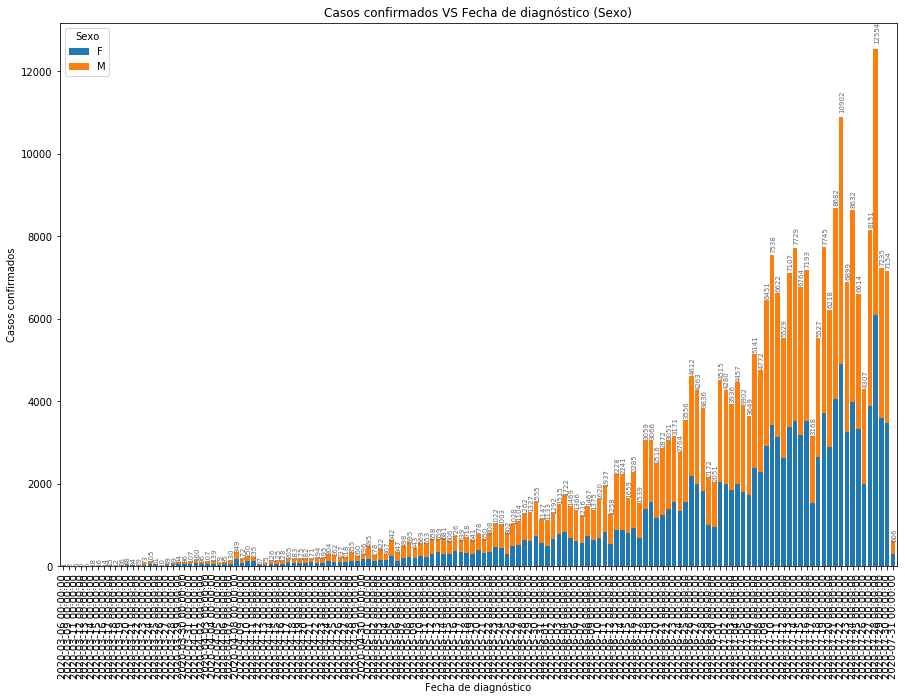

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-27                278      579     1911     1906     1335      979   
2020-07-28                516      938     2868     2832     1991     1692   
2020-07-29                253      476     1750     1738     1221      877   
2020-07-30                264      572     1783     1707     1054      918   
2020-07-31                  9       25      153      192      105       73   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-27                 626      317      182         38  
2020-07-28                 888      534      244         51  
2020-07-29                 514      241      140         25  
2020-07-30                 447      262      123         24  
2020-07-31                  27       15        6          1  

[145 rows x 10 columns]

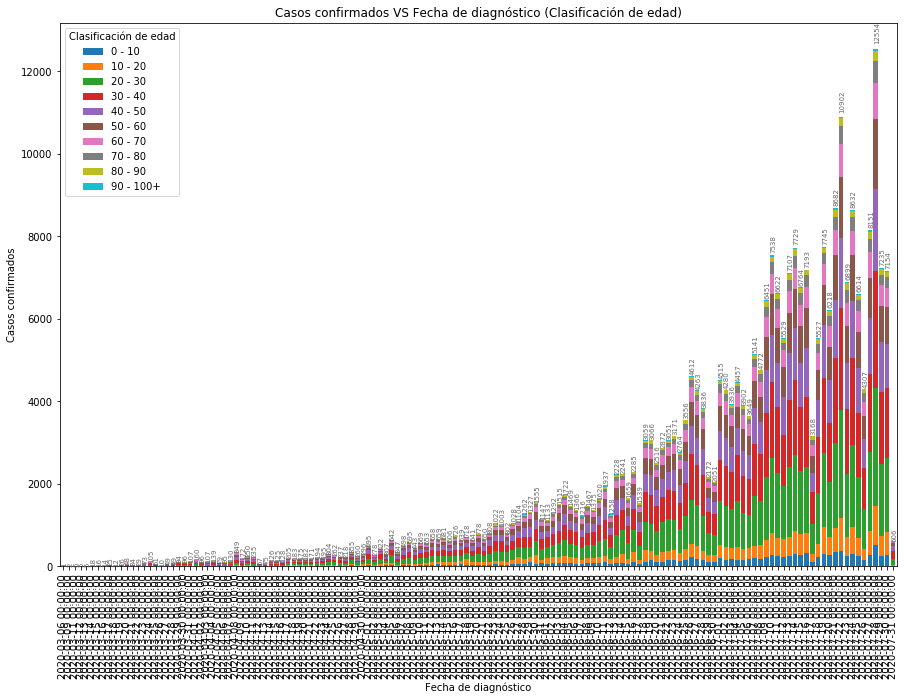

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                   Casa  Fallecido  Hospital  Hospital uci   N/a  \
Fecha de diagnóstico                                                     
2020-03-06                0.0        0.0       0.0           0.0   0.0   
2020-03-09                0.0        0.0       0.0           0.0   0.0   
2020-03-11                0.0        0.0       0.0           0.0   0.0   
2020-03-12                0.0        0.0       0.0           0.0   0.0   
2020-03-13                0.0        0.0       0.0           0.0   0.0   
...                       ...        ...       ...           ...   ...   
2020-07-27             7216.0      155.0     415.0          35.0   7.0   
2020-07-28            11022.0      241.0     765.0          41.0  10.0   
2020-07-29             6615.0       75.0     412.0          37.0   2.0   
2020-07-30             6678.0        2.0     435.0          37.0   0.0   
2020-07-31              583.0        0.0      22.0           1.0   0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-27                 323.0  
2020-07-28                 475.0  
2020-07-29                  94.0  
2020-07-30                   2.0  
2020-07-31                   0.0  

[145 rows x 6 columns]

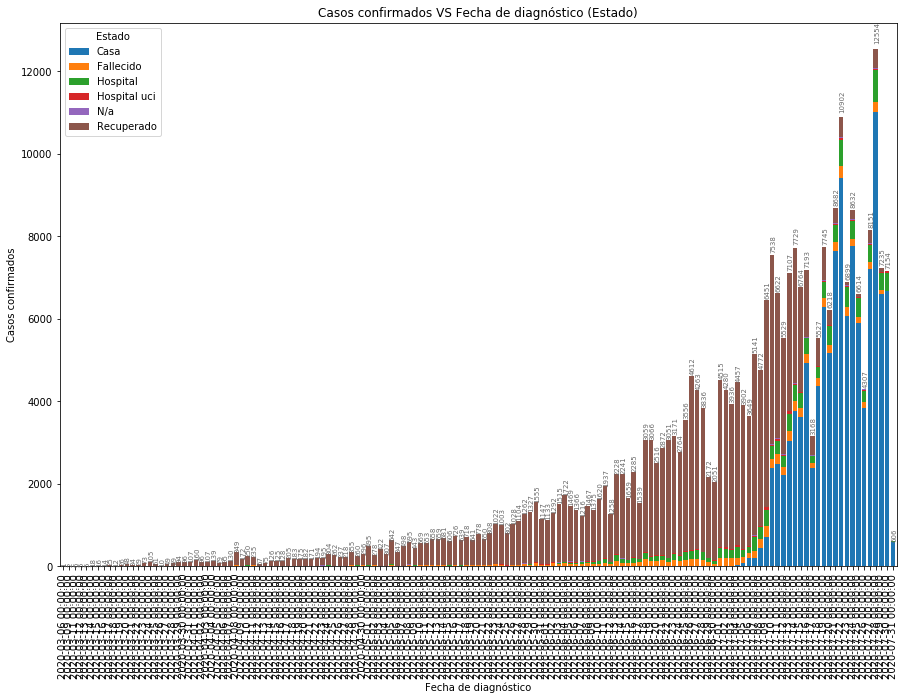

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-27            123015.0  141164.0
2020-07-28            129109.0  147624.0
2020-07-29            132705.0  151263.0
2020-07-30            136185.0  154937.0
2020-07-31            136495.0  155233.0

[145 rows x 2 columns]

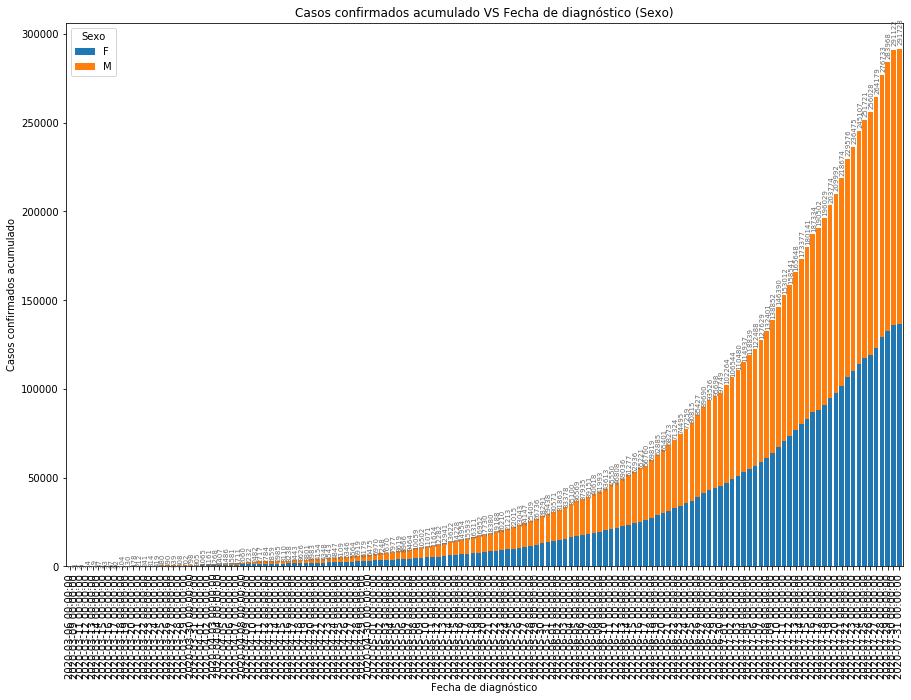

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-27              10885    19866    61049    60940    41573    33717   
2020-07-28              11401    20804    63917    63772    43564    35409   
2020-07-29              11654    21280    65667    65510    44785    36286   
2020-07-30              11918    21852    67450    67217    45839    37204   
2020-07-31              11927    21877    67603    67409    45944    37277   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-27               19526    10517     5153        953  
2020-07-28               20414    11051     5397       1004  
2020-07-29               20928    11292     5537       1029  
2020-07-30               21375    11554     5660       1053  
2020-07-31               21402    11569     5666       1054  

[145 rows x 10 columns]

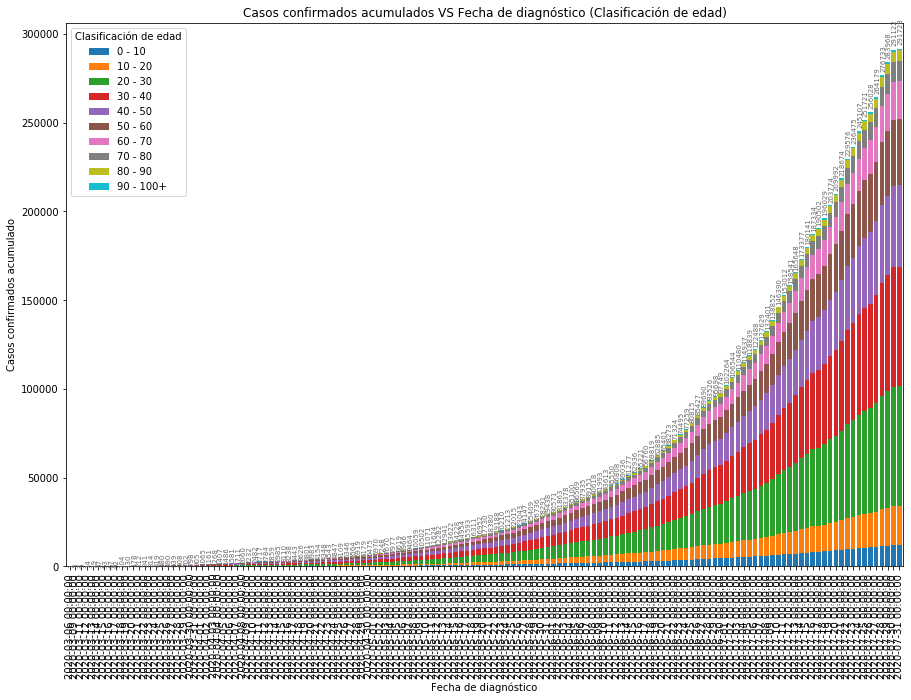

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-07-27             90199.0     9598.0   11927.0        1433.0  580.0   
2020-07-28            101221.0     9839.0   12692.0        1474.0  590.0   
2020-07-29            107836.0     9914.0   13104.0        1511.0  592.0   
2020-07-30            114514.0     9916.0   13539.0        1548.0  592.0   
2020-07-31            115097.0     9916.0   13561.0        1549.0  592.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-27              150442.0  
2020-07-28              150917.0  
2020-07-29              151011.0  
2020-07-30              151013.0  
2020-07-31              151013.0  

[145 rows x 6 columns]

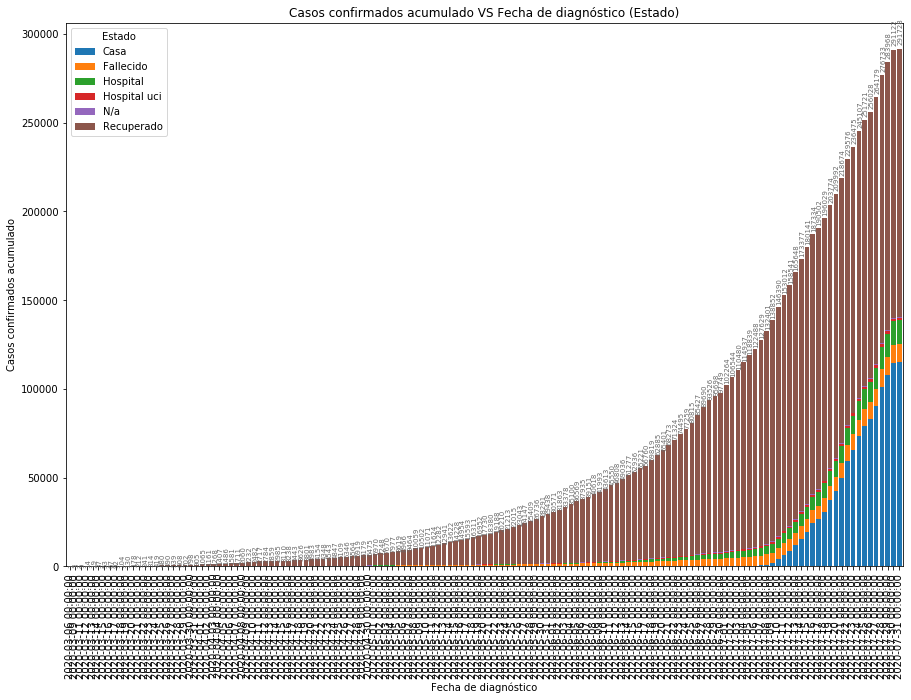

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>